### Define Metric functions

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def SSD(y, y_pred):
    return np.sum(np.square(y - y_pred), axis=1)  # axis 1 is the signal dimension


def MAD(y, y_pred):
    return np.max(np.abs(y - y_pred), axis=1) # axis 1 is the signal dimension


def PRD(y, y_pred):
    N = np.sum(np.square(y_pred - y), axis=1)
    D = np.sum(np.square(y_pred - np.mean(y)), axis=1)

    PRD = np.sqrt(N/D) * 100

    return PRD


def COS_SIM(y, y_pred):
    cos_sim = []

    y = np.squeeze(y, axis=-1)
    y_pred = np.squeeze(y_pred, axis=-1)

    for idx in range(len(y)):
        kl_temp = cosine_similarity(y[idx].reshape(1, -1), y_pred[idx].reshape(1, -1))
        cos_sim.append(kl_temp)

    cos_sim = np.array(cos_sim)
    return cos_sim

### Visualization functions

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prettytable import PrettyTable

def generate_violinplots(np_data, description, ylabel, log):
    # Process the results and store in Panda objects

    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.violinplot(data=pd_df, palette="Set3", bw=.2, cut=1, linewidth=1)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_barplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.barplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_boxplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.boxplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_hboxplot(np_data, description, ylabel, log, set_x_axis_size=None):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)

    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(15, 6))

    ax = sns.boxplot(data=pd_df, orient="h", width=0.4)

    if log:
        ax.set_xscale("log")

    if set_x_axis_size != None:
        ax.set_xlim(set_x_axis_size)

    ax.set(ylabel='Models/Methods', xlabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def ecg_view(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg_blw, 'k', label='ECG + BW')
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.grid(True)

    plt.ylabel('au')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def ecg_view_diff(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.plot(ecg - ecg_dl, color='#0099ff', lw=3, label='Difference ECG - DL Filter')
    plt.plot(ecg - ecg_f, color='#cb828d', lw=3, label='Difference ECG - IIR Filter')
    plt.grid(True)

    plt.ylabel('Amplitude (au)')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def generate_table(metrics, metric_values, Exp_names):
    # Print tabular results in the console, in a pretty way
    tb = PrettyTable()
    ind = 0

    for exp_name in Exp_names:

        tb.field_names = ['Method/Model'] + metrics

        tb_row = []
        tb_row.append(exp_name)

        for metric in metric_values:   # metric_values[metric][model][beat]
            m_mean = np.mean(metric[ind])
            m_std = np.std(metric[ind])
            tb_row.append('{:.3f}'.format(m_mean) + ' (' + '{:.3f}'.format(m_std) + ')')

        tb.add_row(tb_row)
        ind += 1

    print(tb)


def generate_table_time(column_names, all_values, Exp_names, gpu=True):
    # Print tabular results in the console, in a pretty way

    # The FIR and IIR are the last on all_values
    # We need circular shift them to the right
    all_values[0] = all_values[0][-2::] + all_values[0][0:-2]
    all_values[1] = all_values[1][-2::] + all_values[1][0:-2]

    tb = PrettyTable()
    ind = 0

    if gpu:
        device = 'GPU'
    else:
        device = 'CPU'

    for exp_name in Exp_names:
        tb.field_names = ['Method/Model'] + [column_names[0] + '(' + device + ') h:m:s:ms'] + [
            column_names[1] + '(' + device + ') h:m:s:ms']

        tb_row = []
        tb_row.append(exp_name)
        tb_row.append(all_values[0][ind])
        tb_row.append(all_values[1][ind])

        tb.add_row(tb_row)

        ind += 1

    print(tb)

    if gpu:
        print('* For FIR and IIR Filters is CPU since scipy filters are CPU based implementations')

### Load Experiments

In [3]:
import _pickle as pickle
from datetime import datetime
import numpy as np

dl_experiments = ['DRNN',
                  'FCN-DAE',
                  'Vanilla L',
                  'Vanilla NL',
                  'Multibranch LANL',
                  'Multibranch LANLD'
                  ]

# Load timing
with open('timing_nv1.pkl', 'rb') as input:
    timing_nv1 = pickle.load(input)
    [train_time_list_nv1, test_time_list_nv1] = timing_nv1

with open('timing_nv2.pkl', 'rb') as input:
    timing_nv2 = pickle.load(input)
    [train_time_list_nv2, test_time_list_nv2] = timing_nv2

train_time_list = []
test_time_list = []

for i in range(len(train_time_list_nv1)):
    train_time_list.append(train_time_list_nv1[i] + train_time_list_nv2[i])

for i in range(len(test_time_list_nv1)):
    test_time_list.append(test_time_list_nv1[i] + test_time_list_nv2[i])

timing = [train_time_list, test_time_list]

# Load Results DRNN
with open('test_results_' + dl_experiments[0] + '_nv1.pkl', 'rb') as input:
    test_DRNN_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[0] + '_nv2.pkl', 'rb') as input:
    test_DRNN_nv2 = pickle.load(input)

test_DRNN = [np.concatenate((test_DRNN_nv1[0], test_DRNN_nv2[0])),
             np.concatenate((test_DRNN_nv1[1], test_DRNN_nv2[1])),
             np.concatenate((test_DRNN_nv1[2], test_DRNN_nv2[2]))]

# Load Results FCN_DAE
with open('test_results_' + dl_experiments[1] + '_nv1.pkl', 'rb') as input:
    test_FCN_DAE_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[1] + '_nv2.pkl', 'rb') as input:
    test_FCN_DAE_nv2 = pickle.load(input)

test_FCN_DAE = [np.concatenate((test_FCN_DAE_nv1[0], test_FCN_DAE_nv2[0])),
                np.concatenate((test_FCN_DAE_nv1[1], test_FCN_DAE_nv2[1])),
                np.concatenate((test_FCN_DAE_nv1[2], test_FCN_DAE_nv2[2]))]

# Load Results Vanilla L
with open('test_results_' + dl_experiments[2] + '_nv1.pkl', 'rb') as input:
    test_Vanilla_L_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[2] + '_nv2.pkl', 'rb') as input:
    test_Vanilla_L_nv2 = pickle.load(input)

test_Vanilla_L = [np.concatenate((test_Vanilla_L_nv1[0], test_Vanilla_L_nv2[0])),
                  np.concatenate((test_Vanilla_L_nv1[1], test_Vanilla_L_nv2[1])),
                  np.concatenate((test_Vanilla_L_nv1[2], test_Vanilla_L_nv2[2]))]

# Load Results Exp Vanilla NL
with open('test_results_' + dl_experiments[3] + '_nv1.pkl', 'rb') as input:
    test_Vanilla_NL_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[3] + '_nv2.pkl', 'rb') as input:
    test_Vanilla_NL_nv2 = pickle.load(input)

test_Vanilla_NL = [np.concatenate((test_Vanilla_NL_nv1[0], test_Vanilla_NL_nv2[0])),
                   np.concatenate((test_Vanilla_NL_nv1[1], test_Vanilla_NL_nv2[1])),
                   np.concatenate((test_Vanilla_NL_nv1[2], test_Vanilla_NL_nv2[2]))]

# Load Results Multibranch LANL
with open('test_results_' + dl_experiments[4] + '_nv1.pkl', 'rb') as input:
    test_Multibranch_LANL_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[4] + '_nv2.pkl', 'rb') as input:
    test_Multibranch_LANL_nv2 = pickle.load(input)

test_Multibranch_LANL = [np.concatenate((test_Multibranch_LANL_nv1[0], test_Multibranch_LANL_nv2[0])),
                         np.concatenate((test_Multibranch_LANL_nv1[1], test_Multibranch_LANL_nv2[1])),
                         np.concatenate((test_Multibranch_LANL_nv1[2], test_Multibranch_LANL_nv2[2]))]

# Load Results Multibranch LANLD
with open('test_results_' + dl_experiments[5] + '_nv1.pkl', 'rb') as input:
    test_Multibranch_LANLD_nv1 = pickle.load(input)
with open('test_results_' + dl_experiments[5] + '_nv2.pkl', 'rb') as input:
    test_Multibranch_LANLD_nv2 = pickle.load(input)

test_Multibranch_LANLD = [np.concatenate((test_Multibranch_LANLD_nv1[0], test_Multibranch_LANLD_nv2[0])),
                          np.concatenate((test_Multibranch_LANLD_nv1[1], test_Multibranch_LANLD_nv2[1])),
                          np.concatenate((test_Multibranch_LANLD_nv1[2], test_Multibranch_LANLD_nv2[2]))]

# Load Result FIR Filter
with open('test_results_FIR_nv1.pkl', 'rb') as input:
    test_FIR_nv1 = pickle.load(input)
with open('test_results_FIR_nv2.pkl', 'rb') as input:
    test_FIR_nv2 = pickle.load(input)

test_FIR = [np.concatenate((test_FIR_nv1[0], test_FIR_nv2[0])),
            np.concatenate((test_FIR_nv1[1], test_FIR_nv2[1])),
            np.concatenate((test_FIR_nv1[2], test_FIR_nv2[2]))]

# Load Result IIR Filter
with open('test_results_IIR_nv1.pkl', 'rb') as input:
    test_IIR_nv1 = pickle.load(input)
with open('test_results_IIR_nv2.pkl', 'rb') as input:
    test_IIR_nv2 = pickle.load(input)

test_IIR = [np.concatenate((test_IIR_nv1[0], test_IIR_nv2[0])),
            np.concatenate((test_IIR_nv1[1], test_IIR_nv2[1])),
            np.concatenate((test_IIR_nv1[2], test_IIR_nv2[2]))]

### Calculate Metrics

In [4]:
print('Calculating metrics ...')

# DL Metrics

# Exp FCN-DAE

[X_test, y_test, y_pred] = test_DRNN

SSD_values_DL_DRNN = SSD(y_test, y_pred)

MAD_values_DL_DRNN = MAD(y_test, y_pred)

PRD_values_DL_DRNN = PRD(y_test, y_pred)

COS_SIM_values_DL_DRNN = COS_SIM(y_test, y_pred)


# Exp FCN-DAE

[X_test, y_test, y_pred] = test_FCN_DAE

SSD_values_DL_FCN_DAE = SSD(y_test, y_pred)

MAD_values_DL_FCN_DAE = MAD(y_test, y_pred)

PRD_values_DL_FCN_DAE = PRD(y_test, y_pred)

COS_SIM_values_DL_FCN_DAE = COS_SIM(y_test, y_pred)


# Vanilla L

[X_test, y_test, y_pred] = test_Vanilla_L

SSD_values_DL_exp_1 = SSD(y_test, y_pred)

MAD_values_DL_exp_1 = MAD(y_test, y_pred)

PRD_values_DL_exp_1 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_1 = COS_SIM(y_test, y_pred)


# Vanilla_NL

[X_test, y_test, y_pred] = test_Vanilla_NL

SSD_values_DL_exp_2 = SSD(y_test, y_pred)

MAD_values_DL_exp_2 = MAD(y_test, y_pred)

PRD_values_DL_exp_2 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_2 = COS_SIM(y_test, y_pred)


# Multibranch_LANL

[X_test, y_test, y_pred] = test_Multibranch_LANL

SSD_values_DL_exp_3 = SSD(y_test, y_pred)

MAD_values_DL_exp_3 = MAD(y_test, y_pred)

PRD_values_DL_exp_3 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_3 = COS_SIM(y_test, y_pred)


# Multibranch_LANLD

[X_test, y_test, y_pred] = test_Multibranch_LANLD

SSD_values_DL_exp_4 = SSD(y_test, y_pred)

MAD_values_DL_exp_4 = MAD(y_test, y_pred)

PRD_values_DL_exp_4 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_4 = COS_SIM(y_test, y_pred)


# Digital Filtering

# FIR Filtering Metrics
[X_test, y_test, y_filter] = test_FIR

SSD_values_FIR = SSD(y_test, y_filter)

MAD_values_FIR = MAD(y_test, y_filter)

PRD_values_FIR = PRD(y_test, y_filter)

COS_SIM_values_FIR = COS_SIM(y_test, y_filter)


# IIR Filtering Metrics (Best)
[X_test, y_test, y_filter] = test_IIR

SSD_values_IIR = SSD(y_test, y_filter)

MAD_values_IIR = MAD(y_test, y_filter)

PRD_values_IIR = PRD(y_test, y_filter)

COS_SIM_values_IIR = COS_SIM(y_test, y_filter)

Calculating metrics ...


### Results Visualization

In [5]:
SSD_all = [SSD_values_FIR,
           SSD_values_IIR,
           SSD_values_DL_FCN_DAE,
           SSD_values_DL_DRNN,
           SSD_values_DL_exp_1,
           SSD_values_DL_exp_2,
           SSD_values_DL_exp_3,
           SSD_values_DL_exp_4,
           ]

MAD_all = [MAD_values_FIR,
           MAD_values_IIR,
           MAD_values_DL_FCN_DAE,
           MAD_values_DL_DRNN,
           MAD_values_DL_exp_1,
           MAD_values_DL_exp_2,
           MAD_values_DL_exp_3,
           MAD_values_DL_exp_4,
           ]

PRD_all = [PRD_values_FIR,
           PRD_values_IIR,
           PRD_values_DL_FCN_DAE,
           PRD_values_DL_DRNN,
           PRD_values_DL_exp_1,
           PRD_values_DL_exp_2,
           PRD_values_DL_exp_3,
           PRD_values_DL_exp_4,
           ]

COS_SIM_all = [COS_SIM_values_FIR,
               COS_SIM_values_IIR,
               COS_SIM_values_DL_FCN_DAE,
               COS_SIM_values_DL_DRNN,
               COS_SIM_values_DL_exp_1,
               COS_SIM_values_DL_exp_2,
               COS_SIM_values_DL_exp_3,
               COS_SIM_values_DL_exp_4,
               ]


Exp_names = ['FIR Filter', 'IIR Filter'] + dl_experiments

metrics = ['SSD', 'MAD', 'PRD', 'COS_SIM']
metric_values = [SSD_all, MAD_all, PRD_all, COS_SIM_all]

# Metrics table
generate_table(metrics, metric_values, Exp_names)

# Timing table
timing_var = ['training', 'test']
generate_table_time(timing_var, timing, Exp_names, gpu=True)

+-------------------+------------------+---------------+-----------------+---------------+
|    Method/Model   |       SSD        |      MAD      |       PRD       |    COS_SIM    |
+-------------------+------------------+---------------+-----------------+---------------+
|     FIR Filter    | 68.277 (99.723)  | 1.111 (0.820) | 74.697 (18.670) | 0.608 (0.205) |
|     IIR Filter    | 72.136 (109.557) | 1.144 (0.875) | 75.083 (19.031) | 0.601 (0.211) |
|        DRNN       |  7.417 (11.543)  | 0.565 (0.403) | 52.631 (26.436) | 0.865 (0.138) |
|      FCN-DAE      |  9.962 (26.660)  | 0.621 (0.446) | 69.860 (37.692) | 0.821 (0.154) |
|     Vanilla L     | 17.877 (18.200)  | 0.709 (0.394) | 92.351 (20.603) | 0.656 (0.127) |
|     Vanilla NL    |  8.995 (13.560)  | 0.518 (0.383) | 67.500 (37.301) | 0.820 (0.142) |
|  Multibranch LANL |  7.559 (10.811)  | 0.475 (0.371) | 59.848 (32.358) | 0.850 (0.125) |
| Multibranch LANLD |  6.062 (9.169)   | 0.473 (0.369) | 52.410 (35.968) | 0.885 (0.109) |

### Segmentation by noise amplitude

In [6]:
rnd_test = np.load('rnd_test.npy')

rnd_test = np.concatenate([rnd_test, rnd_test])

segm = [0.2, 0.6, 1.0, 1.5, 2.0]  # real number of segmentations is len(segmentations) - 1
SSD_seg_all = []
MAD_seg_all = []
PRD_seg_all = []
COS_SIM_seg_all = []

for idx_exp in range(len(Exp_names)):
    SSD_seg = [None] * (len(segm) - 1)
    MAD_seg = [None] * (len(segm) - 1)
    PRD_seg = [None] * (len(segm) - 1)
    COS_SIM_seg = [None] * (len(segm) - 1)
    for idx_seg in range(len(segm) - 1):
        SSD_seg[idx_seg] = []
        MAD_seg[idx_seg] = []
        PRD_seg[idx_seg] = []
        COS_SIM_seg[idx_seg] = []
        for idx in range(len(rnd_test)):
            # Object under analysis (oua)
            # SSD
            oua = SSD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                SSD_seg[idx_seg].append(oua)

            # MAD
            oua = MAD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                MAD_seg[idx_seg].append(oua)

            # PRD
            oua = PRD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                PRD_seg[idx_seg].append(oua)

            # COS SIM
            oua = COS_SIM_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                COS_SIM_seg[idx_seg].append(oua)

    # Processing the last index
    # SSD
    SSD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = SSD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            SSD_seg[-1].append(oua)

    SSD_seg_all.append(SSD_seg)  # [exp][seg][item]

    # MAD
    MAD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = MAD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            MAD_seg[-1].append(oua)

    MAD_seg_all.append(MAD_seg)  # [exp][seg][item]

    # PRD
    PRD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = PRD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            PRD_seg[-1].append(oua)

    PRD_seg_all.append(PRD_seg)  # [exp][seg][item]

    # COS SIM
    COS_SIM_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = COS_SIM_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            COS_SIM_seg[-1].append(oua)

    COS_SIM_seg_all.append(COS_SIM_seg)  # [exp][seg][item]

# Printing Tables
seg_table_column_name = []
for idx_seg in range(len(segm) - 1):
    column_name = str(segm[idx_seg]) + ' < noise < ' + str(segm[idx_seg + 1])
    seg_table_column_name.append(column_name)

# SSD Table
SSD_seg_all = np.array(SSD_seg_all)
SSD_seg_all = np.swapaxes(SSD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the SSD metric')
generate_table(seg_table_column_name, SSD_seg_all, Exp_names)

# MAD Table
MAD_seg_all = np.array(MAD_seg_all)
MAD_seg_all = np.swapaxes(MAD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the MAD metric')
generate_table(seg_table_column_name, MAD_seg_all, Exp_names)

# PRD Table
PRD_seg_all = np.array(PRD_seg_all)
PRD_seg_all = np.swapaxes(PRD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the PRD metric')
generate_table(seg_table_column_name, PRD_seg_all, Exp_names)

# COS SIM Table
COS_SIM_seg_all = np.array(COS_SIM_seg_all)
COS_SIM_seg_all = np.swapaxes(COS_SIM_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the COS SIM metric')
generate_table(seg_table_column_name, COS_SIM_seg_all, Exp_names)

/home/jhagedorn/miniconda3/envs/DeepFilter/lib/python3.7/site-packages/ipykernel_launcher.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jhagedorn/miniconda3/envs/DeepFilter/lib/python3.7/site-packages/ipykernel_launcher.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray




Printing Table for different noise values on the SSD metric
+-------------------+-------------------+-------------------+-------------------+-------------------+
|    Method/Model   | 0.2 < noise < 0.6 | 0.6 < noise < 1.0 | 1.0 < noise < 1.5 | 1.5 < noise < 2.0 |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|     FIR Filter    |   9.687 (10.416)  |  29.944 (31.286)  |  72.619 (75.133)  | 142.294 (142.176) |
|     IIR Filter    |  10.031 (11.402)  |  31.201 (33.530)  |  76.538 (83.231)  | 151.103 (158.168) |
|        DRNN       |   3.528 (6.663)   |   4.667 (6.457)   |   7.700 (10.258)  |  12.434 (16.170)  |
|      FCN-DAE      |   5.183 (8.421)   |   6.718 (8.476)   |  10.539 (27.904)  |  15.882 (40.530)  |
|     Vanilla L     |   10.142 (7.080)  |   12.350 (9.120)  |  18.450 (15.551)  |  28.020 (26.033)  |
|     Vanilla NL    |   3.974 (5.153)   |   6.252 (7.614)   |   9.621 (11.006)  |  14.630 (20.537)  |
|  Multibranch LANL 

/home/jhagedorn/miniconda3/envs/DeepFilter/lib/python3.7/site-packages/ipykernel_launcher.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/jhagedorn/miniconda3/envs/DeepFilter/lib/python3.7/site-packages/ipykernel_launcher.py:115: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


+-------------------+-------------------+-------------------+-------------------+-------------------+
|    Method/Model   | 0.2 < noise < 0.6 | 0.6 < noise < 1.0 | 1.0 < noise < 1.5 | 1.5 < noise < 2.0 |
+-------------------+-------------------+-------------------+-------------------+-------------------+
|     FIR Filter    |   0.857 (0.080)   |   0.688 (0.120)   |   0.533 (0.137)   |   0.419 (0.139)   |
|     IIR Filter    |   0.854 (0.088)   |   0.680 (0.129)   |   0.525 (0.145)   |   0.411 (0.147)   |
|        DRNN       |   0.935 (0.059)   |   0.906 (0.083)   |   0.856 (0.128)   |   0.784 (0.179)   |
|      FCN-DAE      |   0.906 (0.078)   |   0.864 (0.106)   |   0.805 (0.145)   |   0.733 (0.186)   |
|     Vanilla L     |   0.761 (0.087)   |   0.707 (0.091)   |   0.631 (0.103)   |   0.553 (0.115)   |
|     Vanilla NL    |   0.919 (0.062)   |   0.867 (0.088)   |   0.802 (0.123)   |   0.720 (0.167)   |
|  Multibranch LANL |   0.935 (0.047)   |   0.894 (0.069)   |   0.836 (0.107)   | 

### Plot Graphs

SSD Metric comparative graph


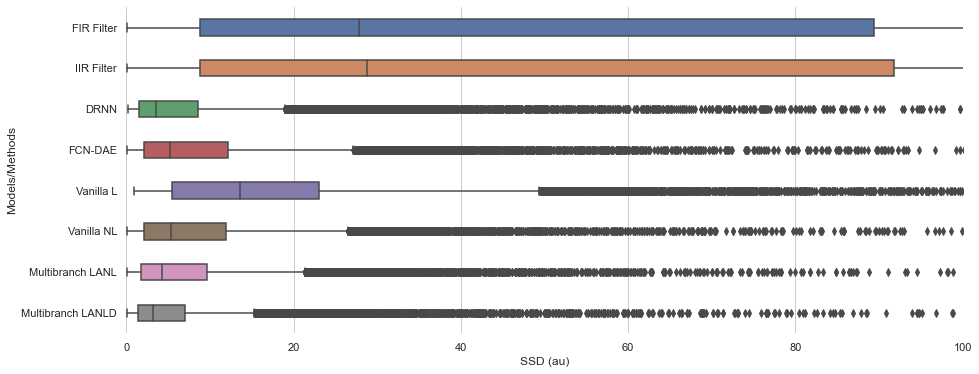

MAD Metric comparative graph


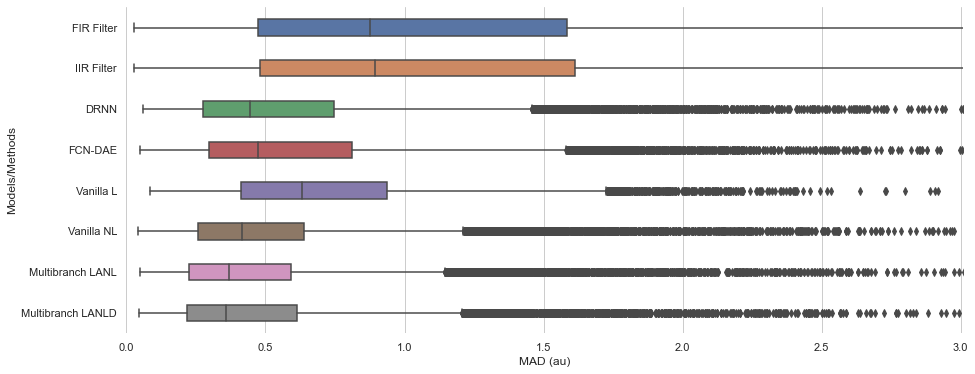

PRD Metric comparative graph


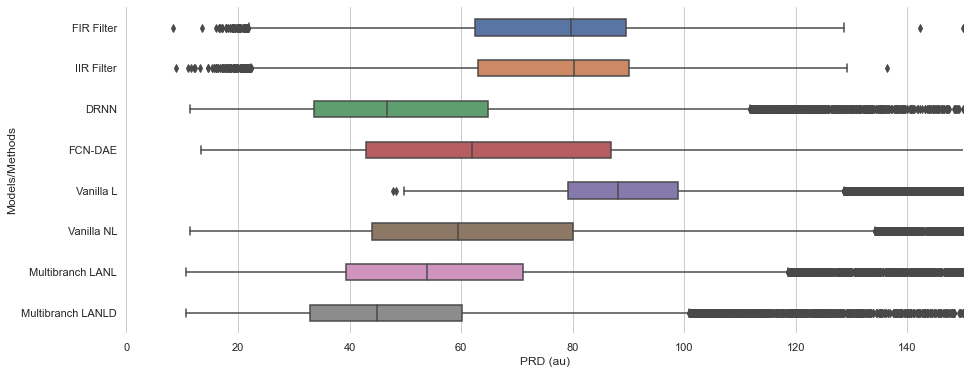

Cosine Similarity Metric comparative graph


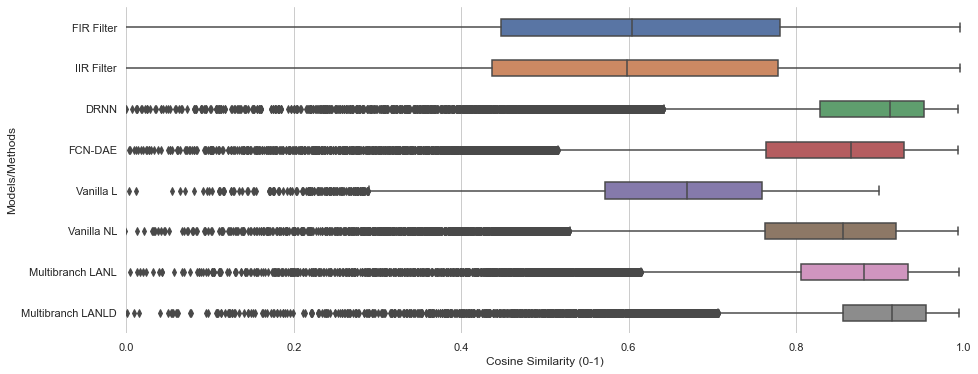

In [7]:
# Metrics graphs
print('SSD Metric comparative graph')
generate_hboxplot(SSD_all, Exp_names, 'SSD (au)', log=False, set_x_axis_size=(0, 100.1))
print('MAD Metric comparative graph')
generate_hboxplot(MAD_all, Exp_names, 'MAD (au)', log=False, set_x_axis_size=(0, 3.01))
print('PRD Metric comparative graph')
generate_hboxplot(PRD_all, Exp_names, 'PRD (au)', log=False, set_x_axis_size=(0, 150.1))
print('Cosine Similarity Metric comparative graph')
generate_hboxplot(COS_SIM_all, Exp_names, 'Cosine Similarity (0-1)', log=False, set_x_axis_size=(0, 1))

### Visualize Signals

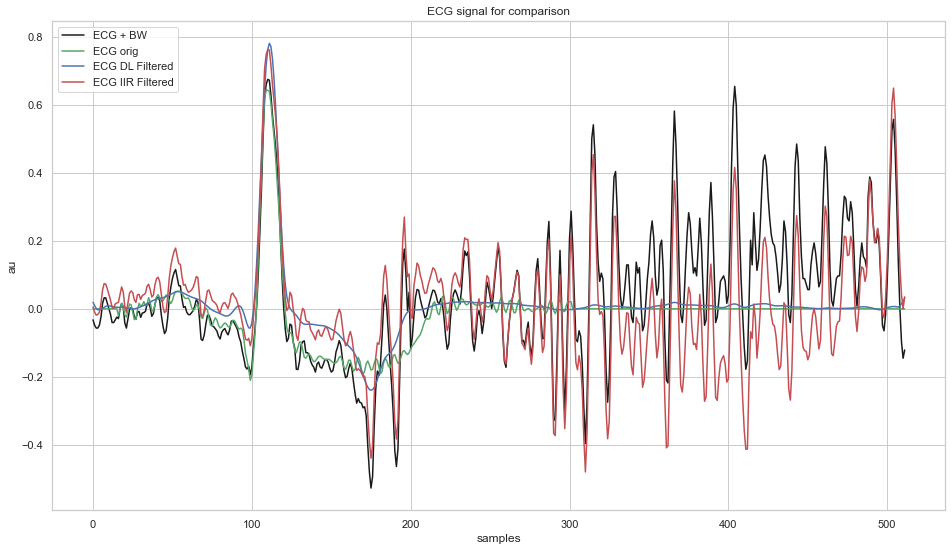

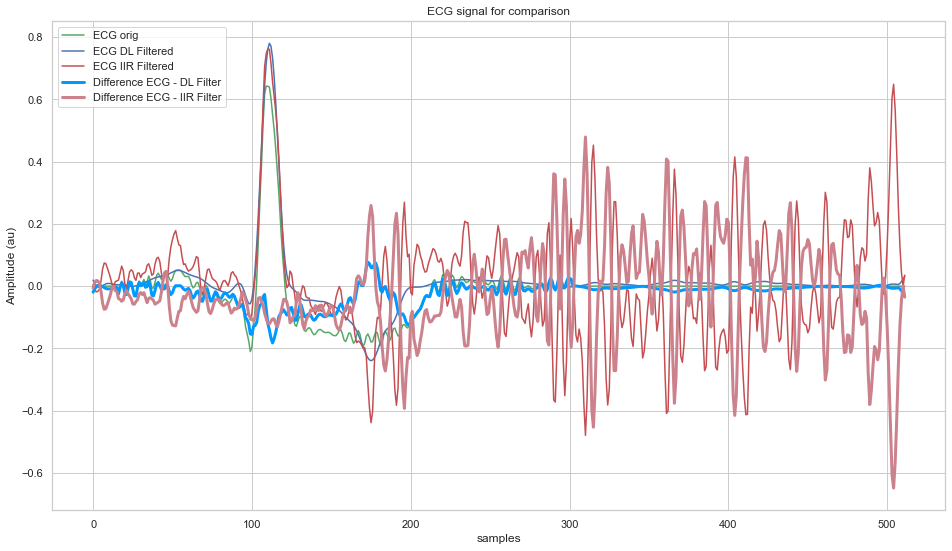

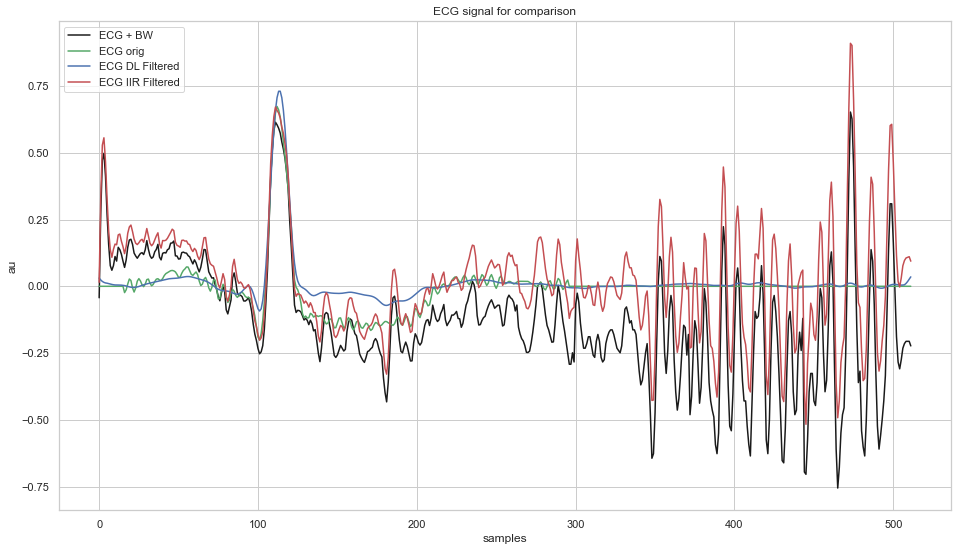

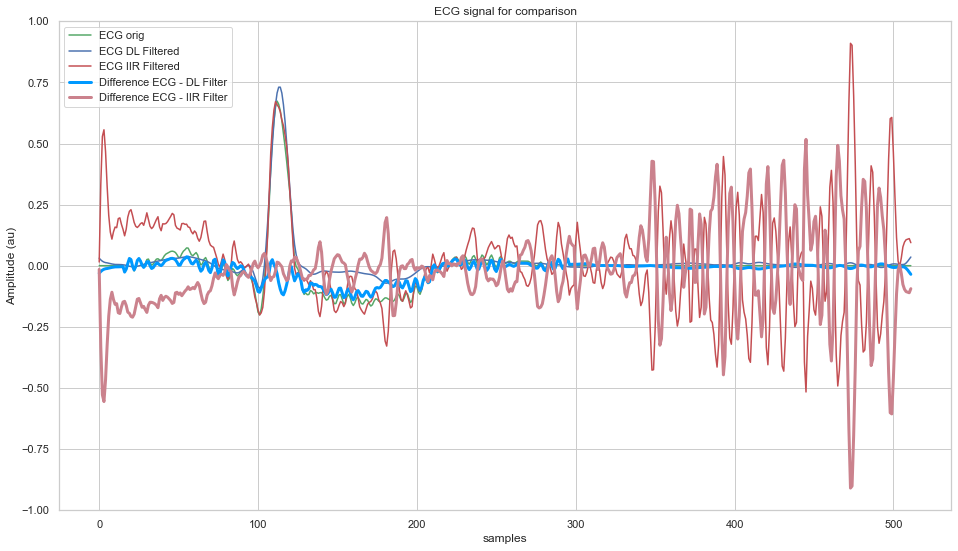

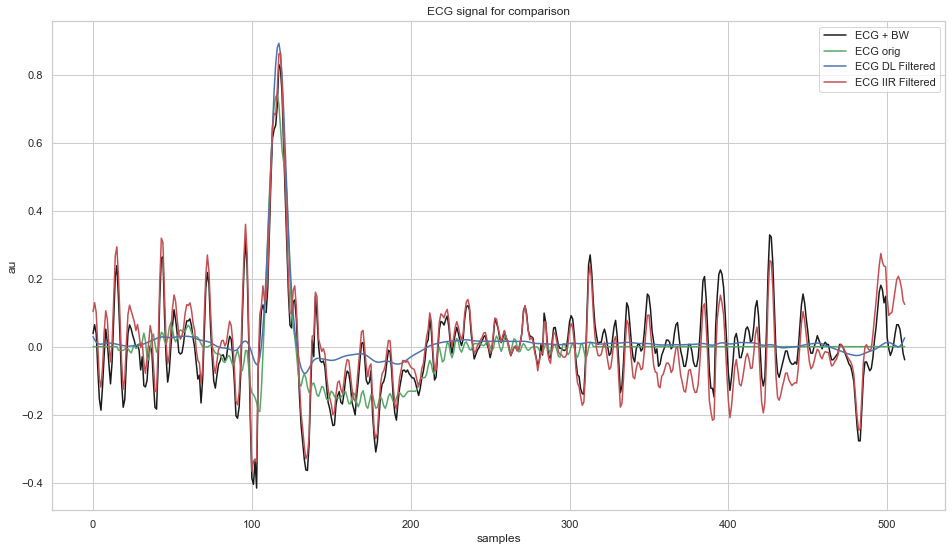

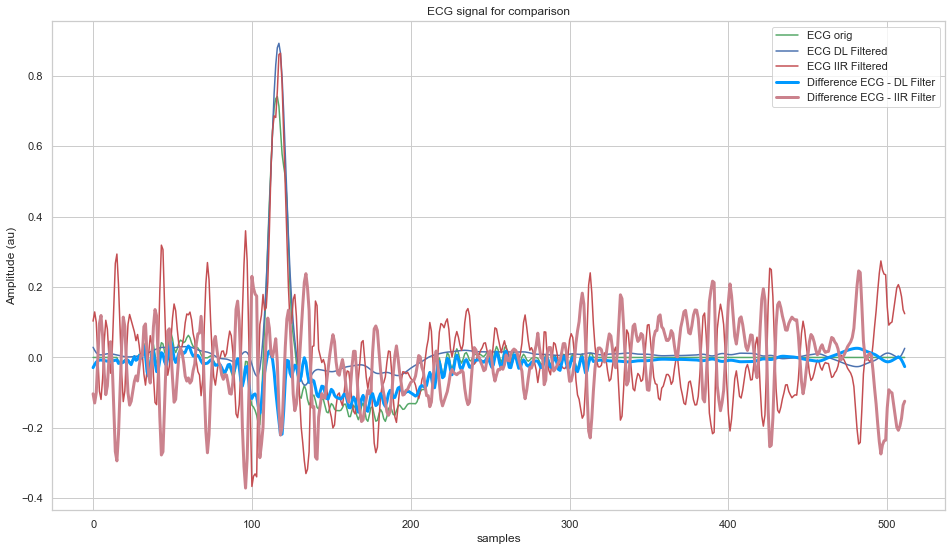

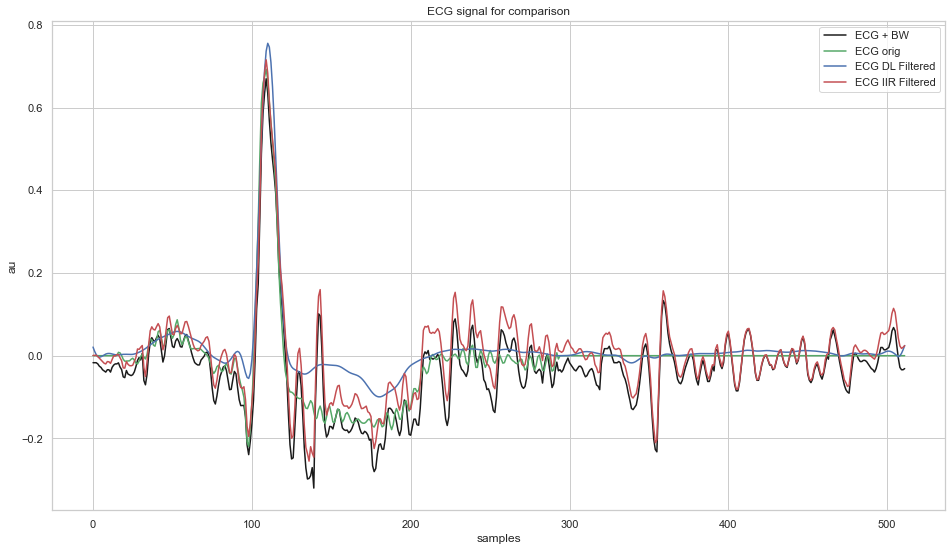

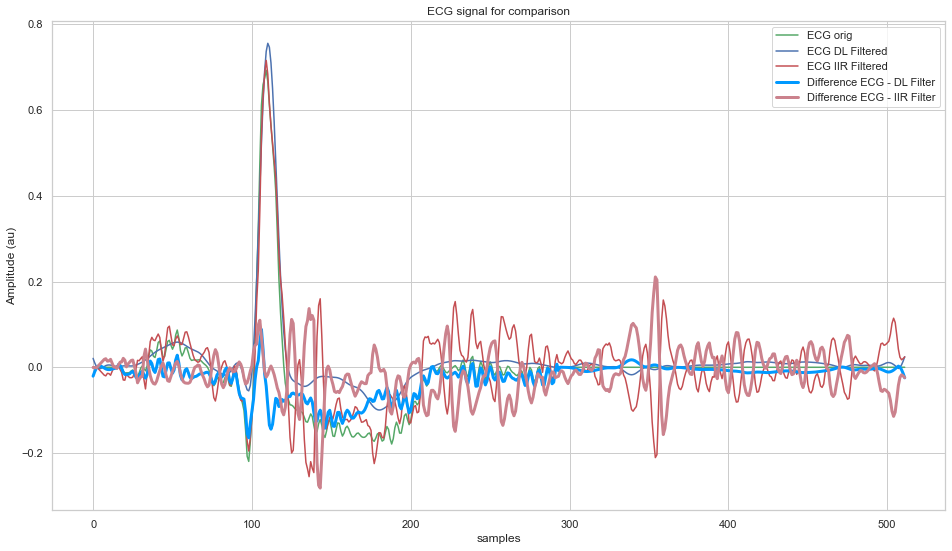

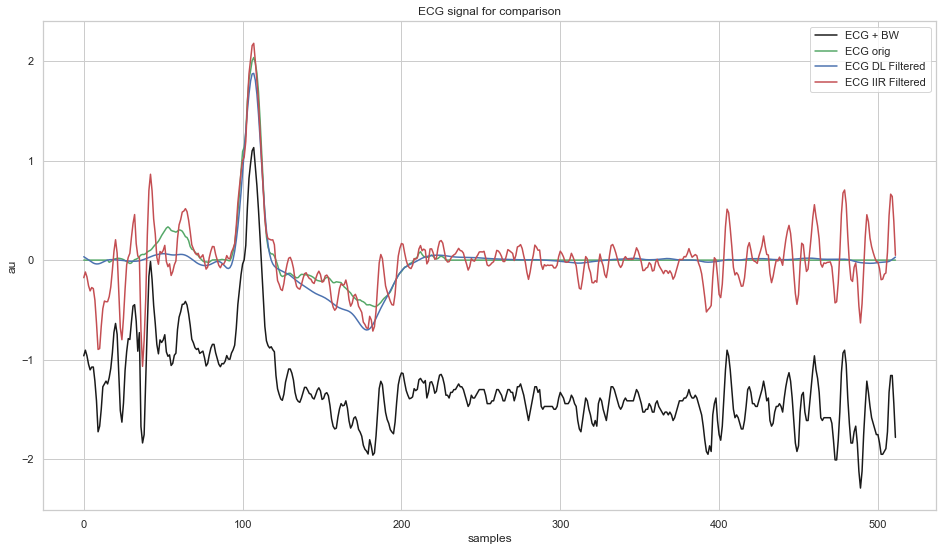

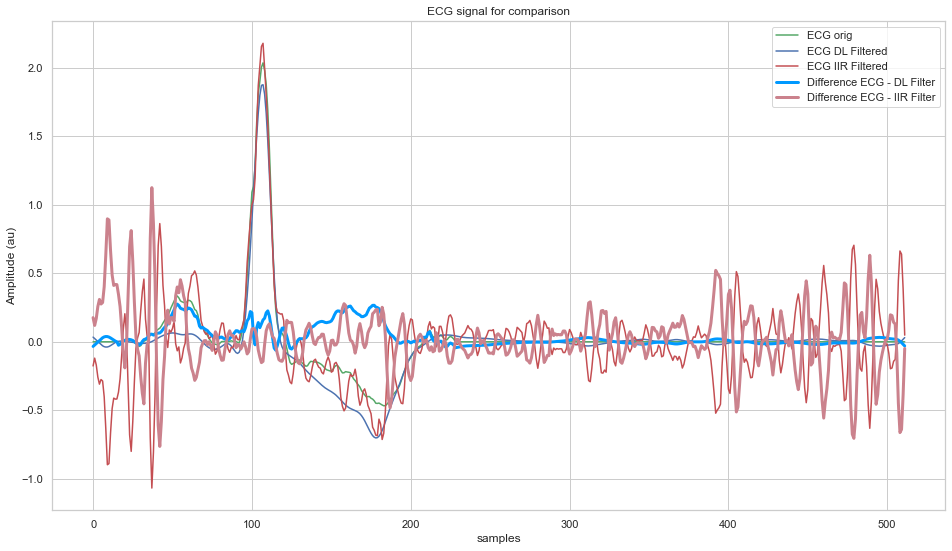

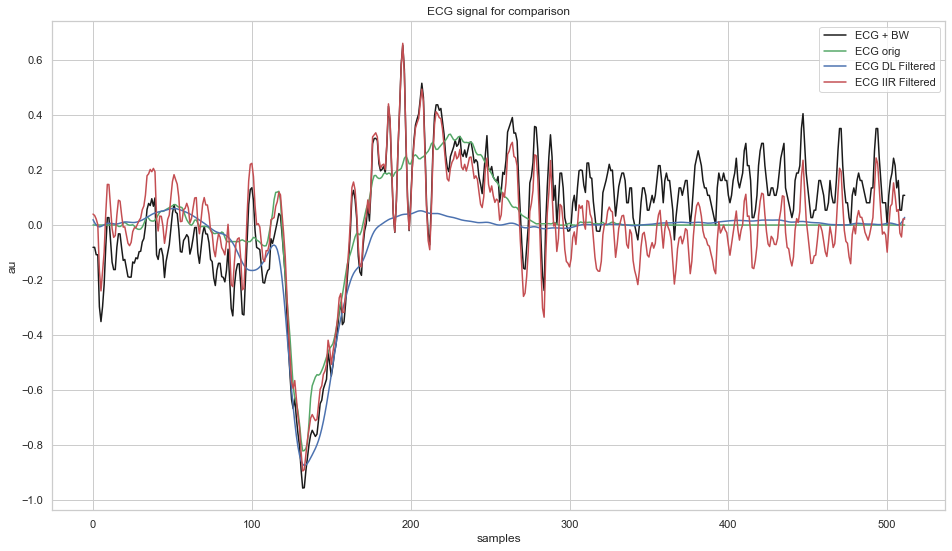

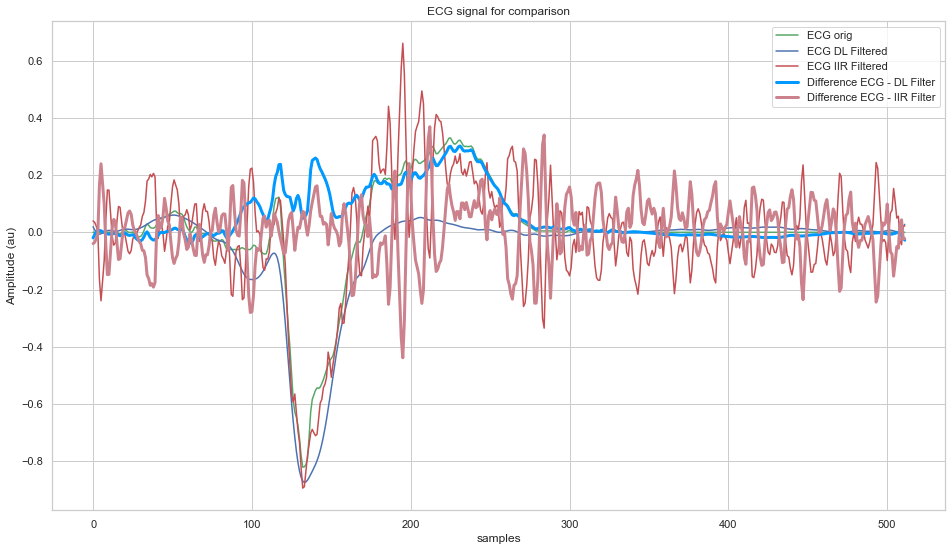

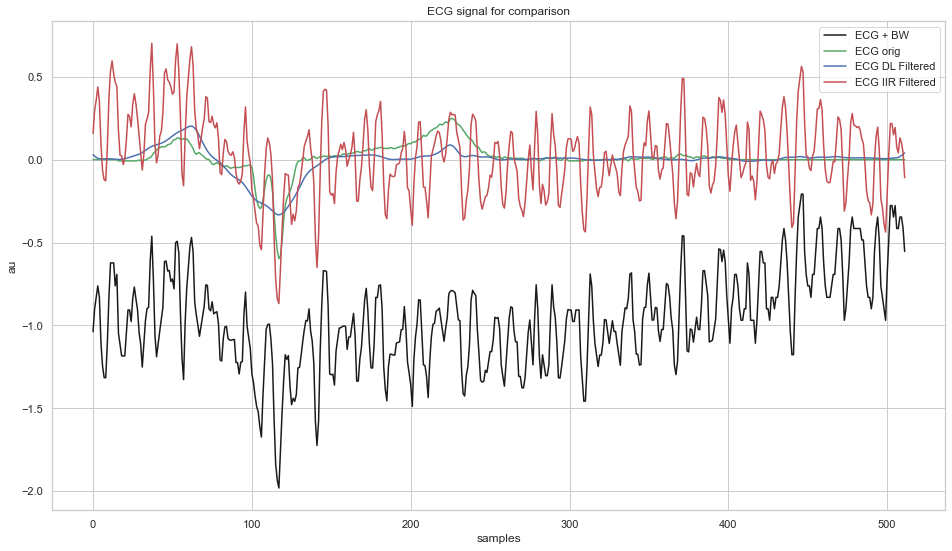

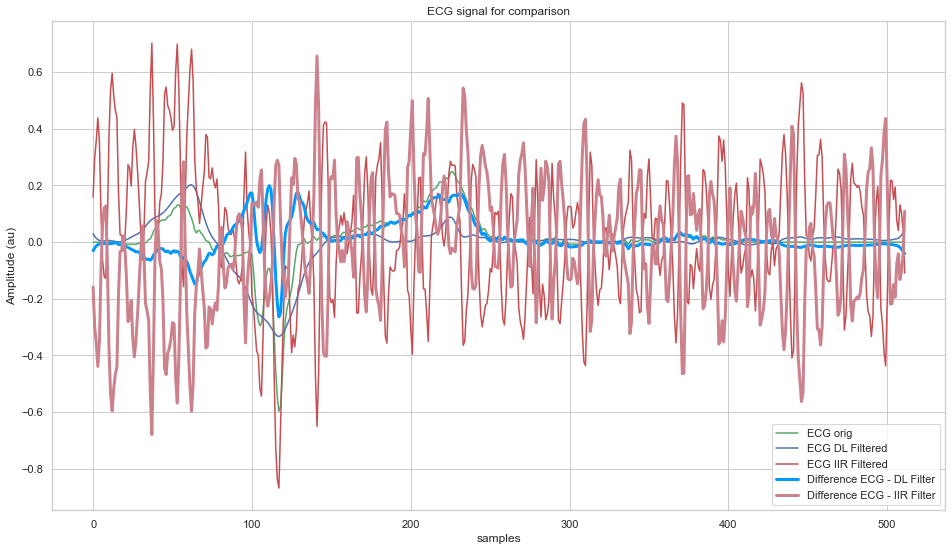

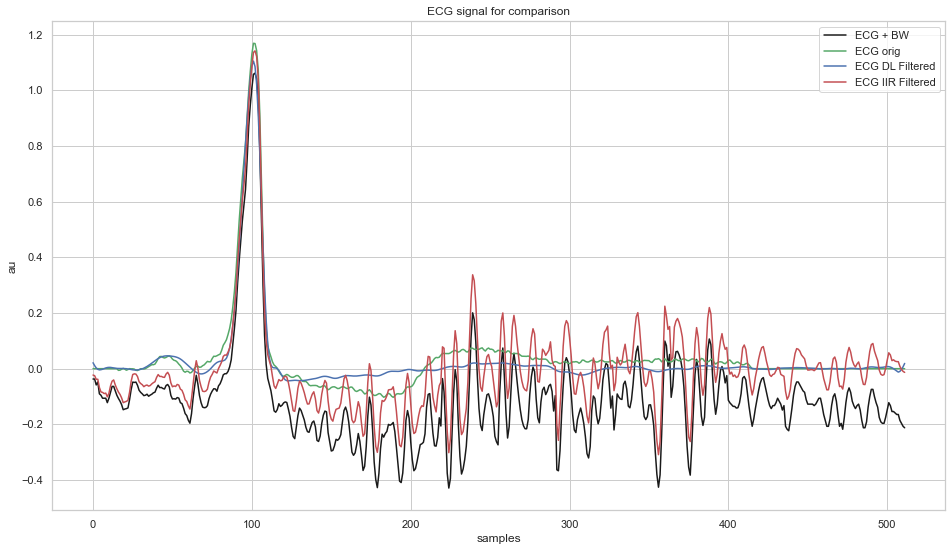

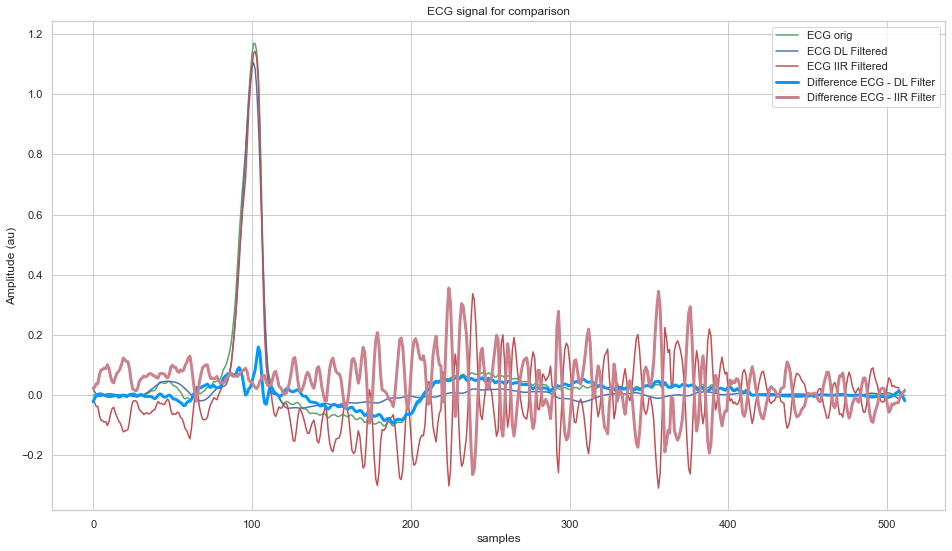

In [8]:
signals_index = np.array([110, 210, 410, 810, 1610, 3210, 6410, 12810]) + 10

ecg_signals2plot = []
ecgbl_signals2plot = []
dl_signals2plot = []
fil_signals2plot = []

signal_amount = 10

[X_test, y_test, y_pred] = test_Multibranch_LANLD
for id in signals_index:
    ecgbl_signals2plot.append(X_test[id])
    ecg_signals2plot.append(y_test[id])
    dl_signals2plot.append(y_pred[id])

[X_test, y_test, y_filter] = test_IIR
for id in signals_index:
    fil_signals2plot.append(y_filter[id])

for i in range(len(signals_index)):
    ecg_view(ecg=ecg_signals2plot[i],
                ecg_blw=ecgbl_signals2plot[i],
                ecg_dl=dl_signals2plot[i],
                ecg_f=fil_signals2plot[i],
                signal_name=None,
                beat_no=None)

    ecg_view_diff(ecg=ecg_signals2plot[i],
                     ecg_blw=ecgbl_signals2plot[i],
                     ecg_dl=dl_signals2plot[i],
                     ecg_f=fil_signals2plot[i],
                     signal_name=None,
                     beat_no=None)